In [1]:
install.packages('randomForest')
require(randomForest)
set.seed(7649)
x1 <- round(runif(1000, min = 0, max = 1),6)
x2 <- round(runif(1000, min = 0, max = 1),6)
x3 <- round(runif(1000, min = 0, max = 1),6)
x4 <- round(runif(1000, min = 0, max = 1),6)
x5 <- round(runif(1000, min = 0, max = 1),6)


The downloaded binary packages are in
	/var/folders/q5/rdk7wzh90cb24w08llgm83y00000gn/T//RtmpwOidHT/downloaded_packages


Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
e <- round(rnorm(1000, mean = 0, sd = 10),6)

In [3]:
train <- data.frame(cbind(x1,x2,x3,x4,x5,e))
colnames(train) <- c('X1','X2', 'X3','X4', 'X5','E')

train$I <- 10*sin(pi*train$X1*train$X2)+ 20*(train$X3 -0.5)^2 + 10*train$X4 +5*train$X5 + e

In [4]:
eq <- I~X1+X2+X3+X4+X5+E

In [5]:
model <- randomForest(eq,data=train,ntree=50)
print(model)


Call:
 randomForest(formula = eq, data = train, ntree = 50) 
               Type of random forest: regression
                     Number of trees: 50
No. of variables tried at each split: 2

          Mean of squared residuals: 9.712956
                    % Var explained: 92.19


In [6]:
pred <-predict(model, train[,c(1:6)], type="response", predict.all=TRUE)

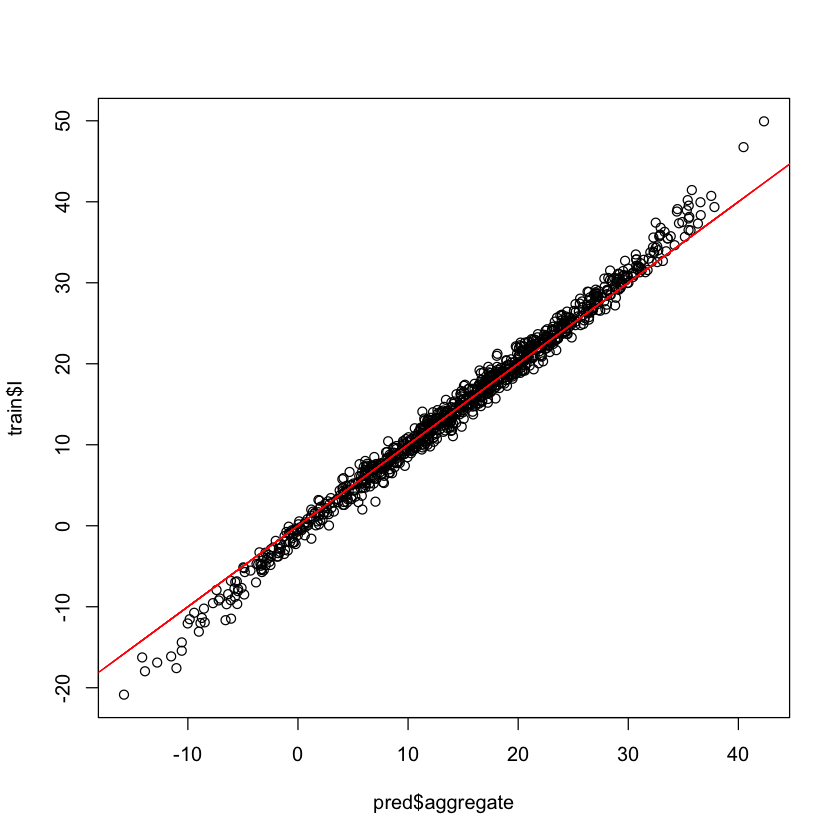

In [7]:
plot(pred$aggregate,train$I)
lines(train$I,train$I, col= "red")

In [8]:
tx1 <- round(runif(1000, min = 0, max = 1),6)
tx2 <- round(runif(1000, min = 0, max = 1),6)
tx3 <- round(runif(1000, min = 0, max = 1),6)
tx4 <- round(runif(1000, min = 0, max = 1),6)
tx5 <- round(runif(1000, min = 0, max = 1),6)
te <- round(rnorm(1000, mean = 0, sd = 1),6)
test <- data.frame(cbind(tx1,tx2,tx3,tx4,tx5,te))
colnames(test) <- c('X1','X2', 'X3','X4', 'X5','E')

In [9]:
tpred <-predict(model, newdata=test, type="response", predict.all=TRUE)

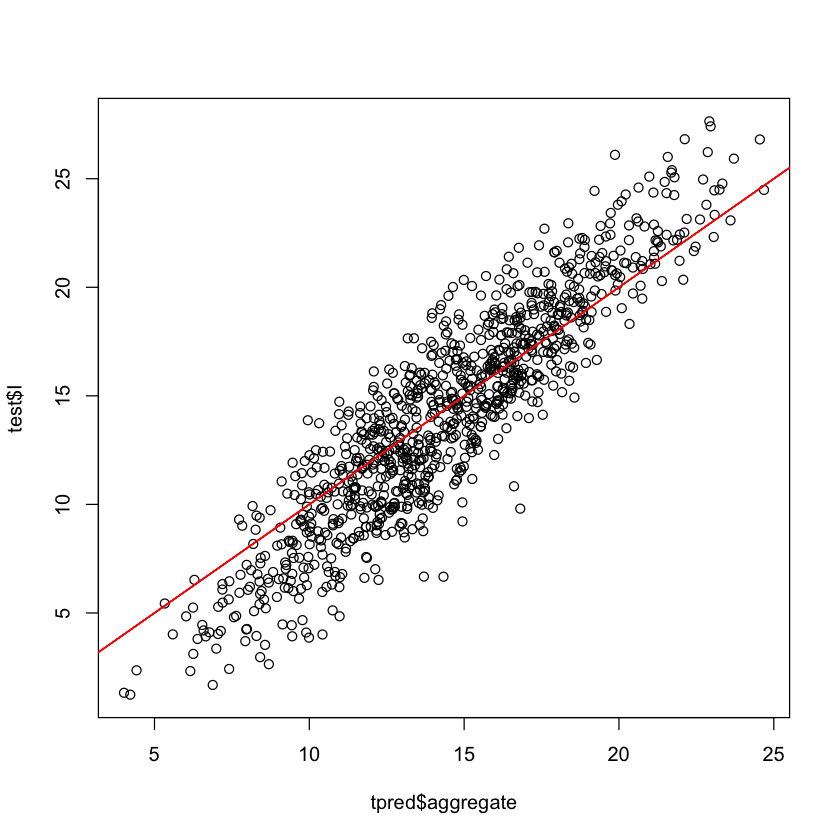

In [10]:
test$I <- 10*sin(pi*test$X1*test$X2)+ 20*(test$X3 -0.5)^2 + 10*test$X4 +5*test$X5 + te
plot(tpred$aggregate,test$I)
lines(test$I,test$I, col= "red")